In [89]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [90]:

def create_data(samples, classes):
    X = np.zeros((samples*classes, 2))
    y = np.zeros(samples*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(samples*class_number, samples*(class_number+1))
        X[ix] = np.c_[np.random.randn(samples)*.1 + (class_number)/3, np.random.randn(samples)*.1 + 0.5]
        y[ix] = class_number
    return X,y

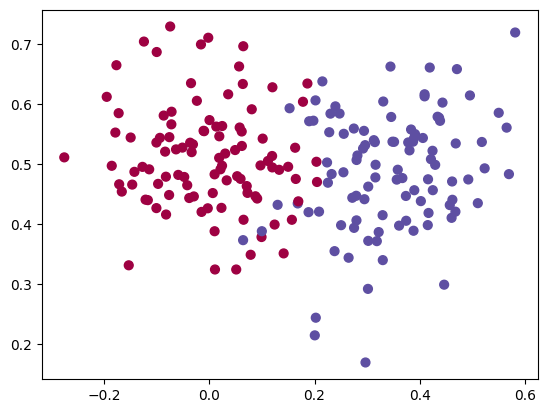

In [91]:
verticaldata = create_data(100, 2)
data = np.random.permutation([np.concatenate((verticaldata[0][i],[verticaldata[1][i]]), axis=0).tolist() for i in range(len(verticaldata[0]))])
x = data[:,:2]
y = data[:, 2]
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [92]:
print(x.shape, y.shape)
print(x[0],y[0])

(200, 2) (200,)
[0.3298501  0.34057111] 1.0


In [93]:
def forword(x, w, b):
    return np.dot(x, w) + b

In [94]:
# test
w1 = [[2],[3]]
x1 = [[1,2],[3,4]]
b1 = 1
forword(x1,w1,b1)

array([[ 9],
       [19]])

In [95]:
def binaryCrossEntropyLoss(y, y_pred):
    res = []
    for i in range(len(y)):
        a = 0
        if y[i] == 1:
            a = y[i] * np.log((y_pred[i].item() if y_pred[i].item() > 0 else -y_pred[i].item() ))
        elif y[i] == 0:
            a = (1-y[i]) * np.log(1-y_pred[i].item() if 1-y_pred[i].item() > 0 else -1 * -y_pred[i].item())
        
        res.append(a)
    return -np.mean(res)

In [96]:
def accuracy(y,y_pred):
    if len(y.shape) == 1:
        '''
        y_pred = [
            [0.7, 0.1,0.2],
            [0.1, 0.5, 0.4], 
            [0.02,0.9, 0.08]
        ]
        y = [0,1,1]
        '''
        return np.mean(np.argmax(y_pred, axis=1) == y)
    elif len(y.shape) == 2:
        '''
          ypred = [
            [0.7, 0.1,0.2],
            [0.1, 0.5, 0.4], 
            [0.02,0.9, 0.08]
        ]
        y = [
            [1,0,0],
            [0,1,0],
            [0,1,0]
        ]
        '''
        return np.mean(np.argmax(y_pred, axis=1) == np.argmax(y, axis=1))
    return

In [97]:
def sigmoid(x):
 return 1/(1 + np.exp(-x))

In [98]:
def der_sigmoid(x):
  return sigmoid(x) * (1- sigmoid(x))

In [99]:
def gradient_classification(w, b, x, y, y_pred, lr = 0.01):
    y = y.reshape(len(y),1)
    error = np.concatenate(y_pred - y)
    for i in range(len(w)):
        w[i] = w[i] - ((x[:,i] * error * der_sigmoid(x[:,i])).mean() * lr  )
    b = b -  (error.mean()  * lr)
    return w,b

In [100]:
def getRandomWeight(*r):
    # return np.random.randn(*r)
    return np.zeros(r) + 0.1

In [101]:
def softmax(value):
    value = np.exp(value)
    total = sum(value)
    return list(map(lambda a: a / total, value))

In [129]:
w = getRandomWeight(2,1)
b = getRandomWeight(1)
for i in range(10) :
    y_pred = sigmoid(forword(x, w, b))
    loss = binaryCrossEntropyLoss(y,y_pred)
    w,b = gradient_classification(w,b,x,y,y_pred)
    print(f"Epoch: {i+1}, Loss: {loss}, Accuracy: {accuracy(y, y_pred)} ")
    

Epoch: 1, Loss: 0.7649904255477291, Accuracy: 0.5 
Epoch: 2, Loss: 0.7645728641693436, Accuracy: 0.5 
Epoch: 3, Loss: 0.764157102239727, Accuracy: 0.5 
Epoch: 4, Loss: 0.7637431331183953, Accuracy: 0.5 
Epoch: 5, Loss: 0.7633309501764424, Accuracy: 0.5 
Epoch: 6, Loss: 0.7629205467966403, Accuracy: 0.5 
Epoch: 7, Loss: 0.762511916373539, Accuracy: 0.5 
Epoch: 8, Loss: 0.7621050523135632, Accuracy: 0.5 
Epoch: 9, Loss: 0.76169994803511, Accuracy: 0.5 
Epoch: 10, Loss: 0.7612965969686444, Accuracy: 0.5 


In [103]:
y1 = np.copy(y.reshape(len(y),1))
y1_pred = np.copy(y_pred)
x1 = np.copy(x)
print("X : ",x1.shape)
print("y : ",y1.reshape(len(y1),1).shape)
print("y_pred : ",y1_pred.shape)
print((y1 - (y1_pred)).shape)

X :  (200, 2)
y :  (200, 1)
y_pred :  (200, 1)
(200, 1)
